In [26]:

import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


**Loading the Training dataset**

In [27]:
#loading the dataset and inputting column /feature headings 
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [28]:
#number of rows and columns
df.shape

(19020, 11)

Checking for missing values 

In [29]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


HOT ENCODING 

Here we want to change the values especially our target value **class** into numerical(nominal values) which the computer understands

So here all **g**'s are replaced with 1 

In [30]:
df["class"] = (df["class"] == "g").astype(int)

In [31]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

checking for unique values in the target value (class)

In [32]:
df["class"].unique()


array([1, 0])

**DATASET SUMMARY**

In [33]:

# Get basic statistics of the DataFrame
print(df.describe())


            fLength        fWidth         fSize         fConc        fConc1   
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  \
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist   
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  \
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439    

Visualize our data and see relationship between our input features and the target variable **class** and its inputs values (0,1) or Gamma (g) and hadron (h)

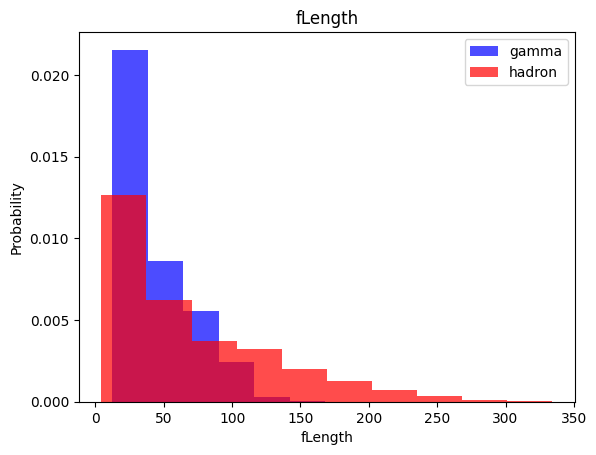

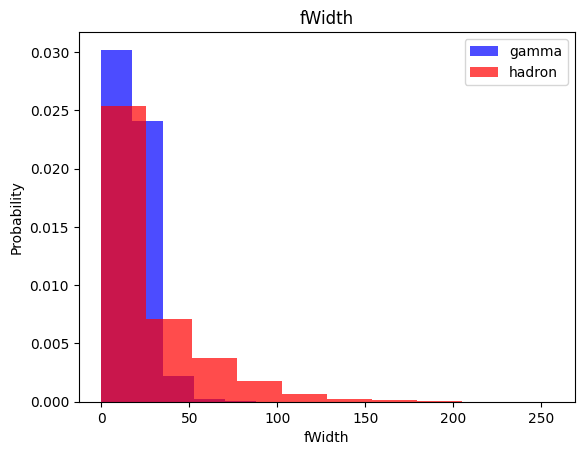

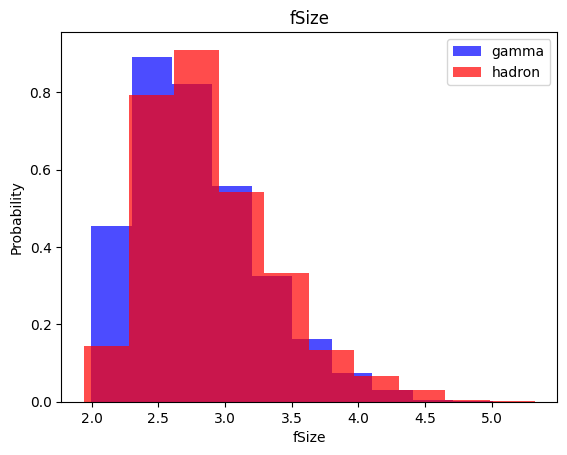

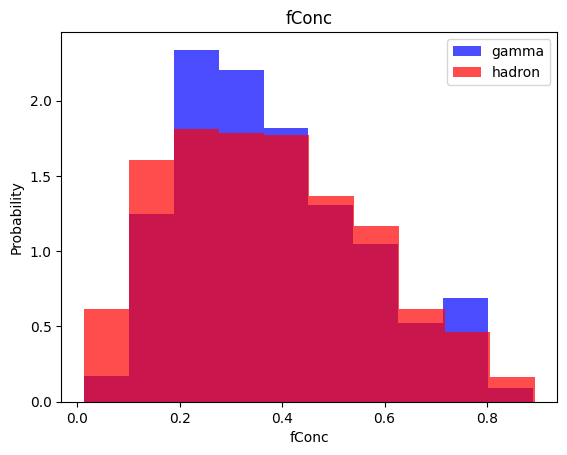

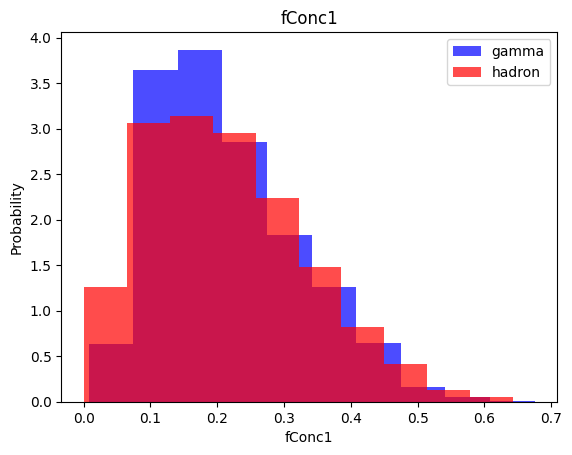

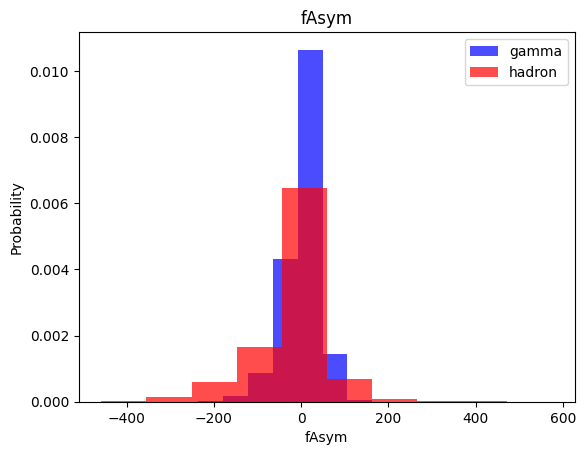

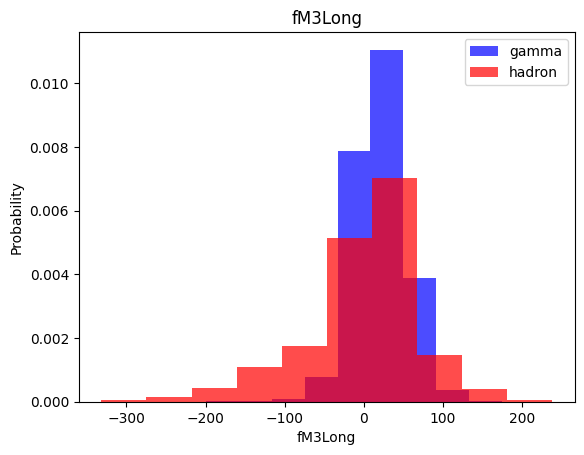

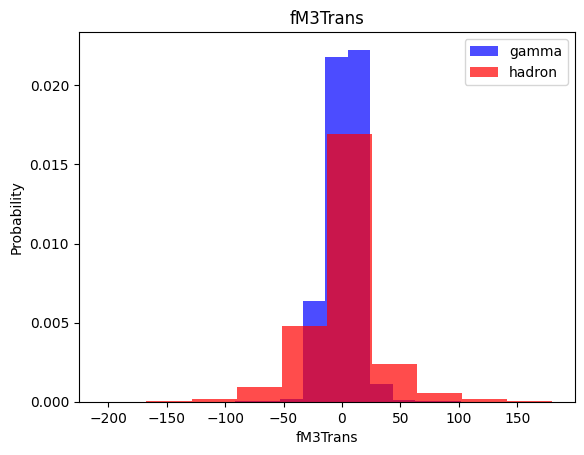

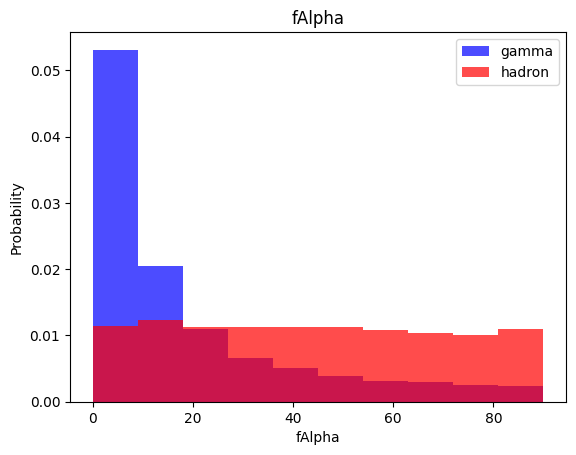

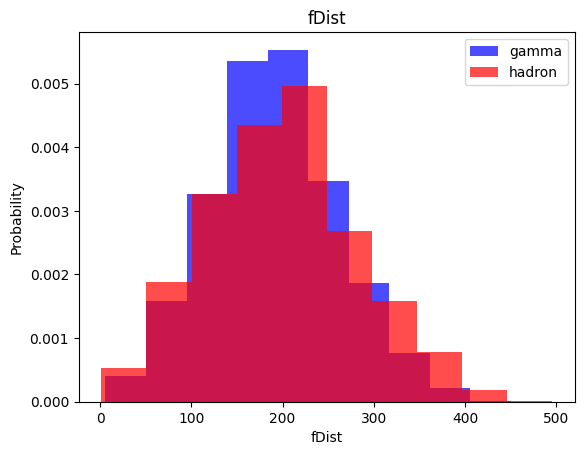

In [34]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**SPLITTING OUR DATA**

We split dataset into training , testing and validation


`df.sample(frac=1)` randomly shuffles all the rows in the DataFrame `df`. The `frac=1` argument ensures that the entire DataFrame is sampled.


The list `[int(0.6*len(df)), int(0.8*len(df))]` specifies the indices at which to split the DataFrame. Here's what each index represents:
   - `int(0.6*len(df))` calculates 60% of the length of the DataFrame `df` and converts it to an integer. This index is used to split the DataFrame into the training and remaining portions.
   - `int(0.8*len(df))` calculates 80% of the length of the DataFrame `df` and converts it to an integer. This index is used to split the remaining portion into the validation and testing subsets.

4. The `split()` function returns three DataFrames: `train`, `valid`, and `test`, assigned in order of appearance. Each DataFrame represents a distinct subset of the original data:
   - `train` contains the first 60% of the shuffled DataFrame, serving as the training dataset.
   - `valid` contains the next 20% of the shuffled DataFrame, representing the validation dataset.
   - `test` contains the remaining 20% of the shuffled DataFrame, used as the testing dataset.

By randomly shuffling the DataFrame and splitting it into these three subsets,This helps in assessing the model's performance on unseen data and avoiding overfitting.

In [35]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [36]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [37]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [38]:
df['class'].value_counts()


class
1    12332
0     6688
Name: count, dtype: int64

# Support Vector Machine

In [39]:
# Instantiate the classifier
svc = SVC() 

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Predict on the testing data
y_pred = svc.predict(X_test)

# Print the model accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8644


In [40]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8746


In [41]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8680


In [42]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7942


In [43]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7939


In [44]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7942


Comparing the test and train accuracy scores

In [45]:
from sklearn.svm import LinearSVC

# Create and train the linear SVC model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = linear_svc.predict(X_train)

y_pred_train = linear_svc.predict(X_train)

y_pred_train

/home/hello/.conda/envs/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 1, 1, ..., 0, 0, 0])

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7642


In [47]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7642
Test set score: 0.7942


K NEAREST NEIGHBOR

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1297
           1       0.87      0.85      0.86      2507

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



**Naive Bayes**

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [54]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1297
           1       0.75      0.89      0.81      2507

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [55]:
import tensorflow as tf

2023-05-11 22:55:06.339691: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 22:55:07.469350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 22:55:07.470404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 22:55:19.420118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [56]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [57]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


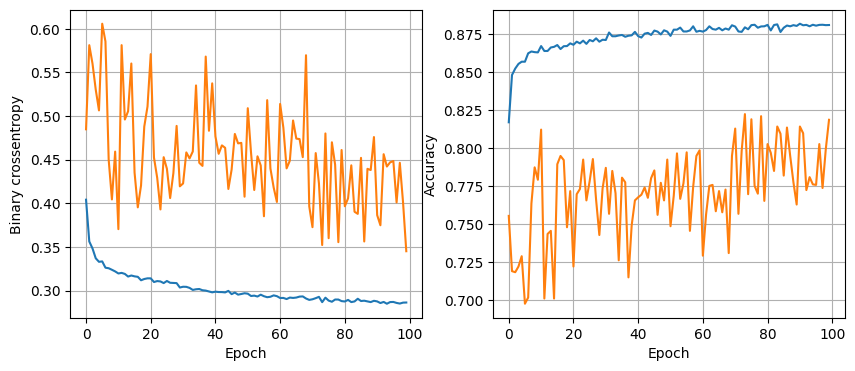

119/119 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.01, batch size 64


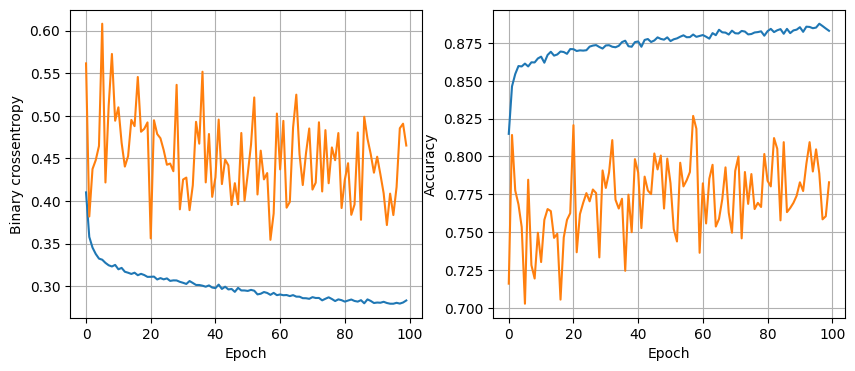

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.01, batch size 128


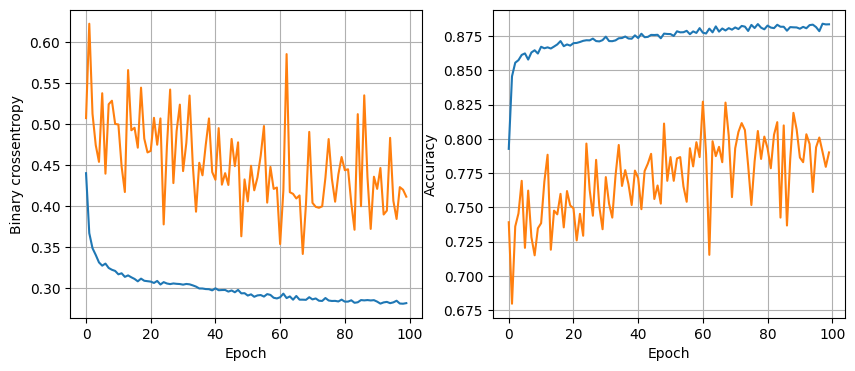

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8762
16 nodes, dropout 0, lr 0.005, batch size 32


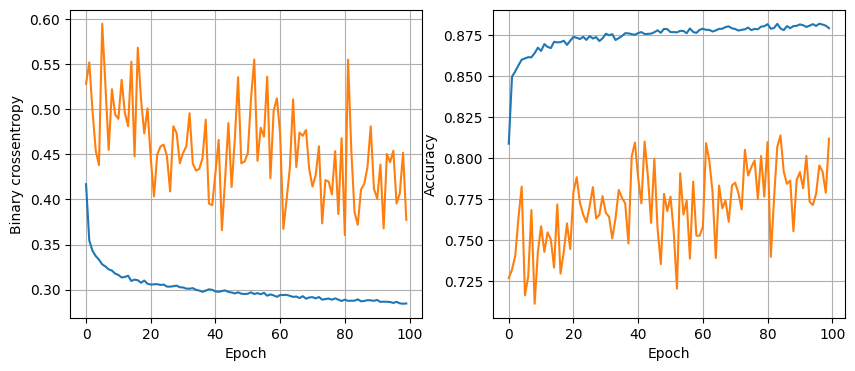

119/119 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8659
16 nodes, dropout 0, lr 0.005, batch size 64


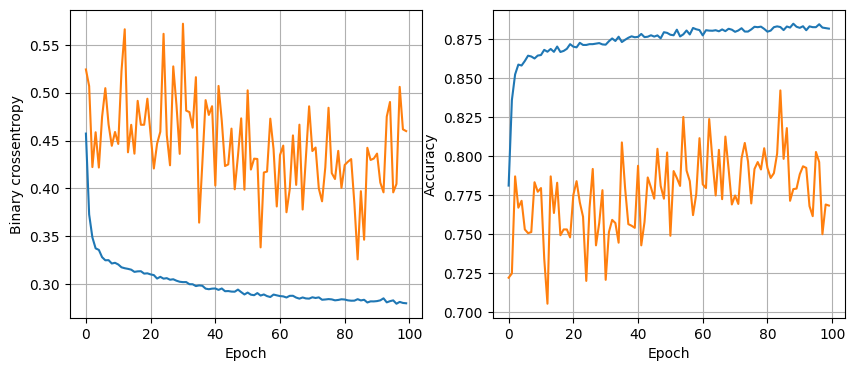

119/119 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.005, batch size 128


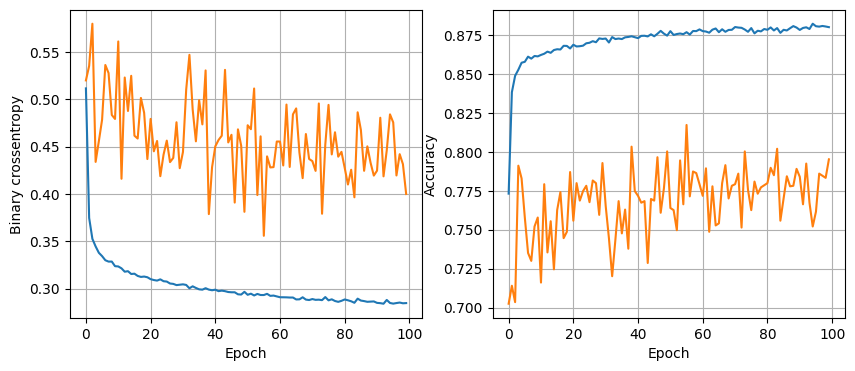

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.001, batch size 32


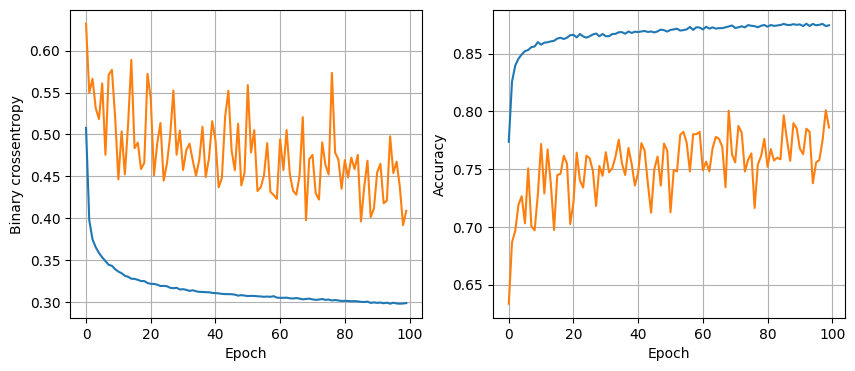

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.001, batch size 64


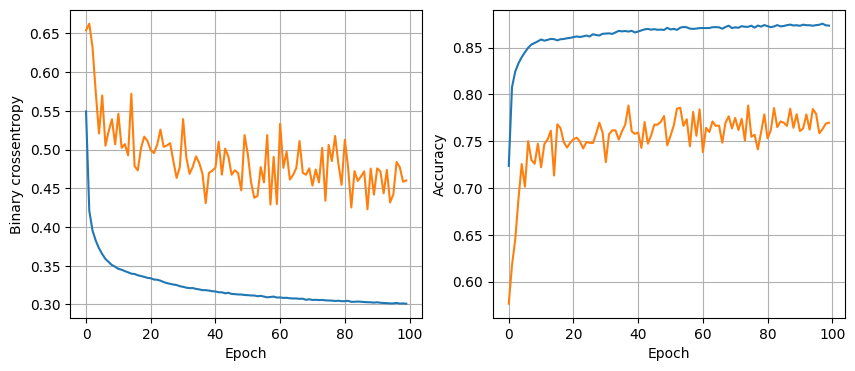

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.001, batch size 128


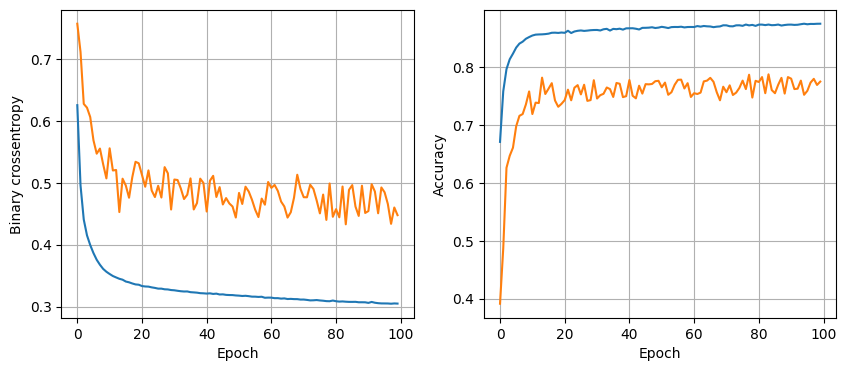

119/119 [==============================] - 1s 3ms/step - loss: 0.3089 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.01, batch size 32


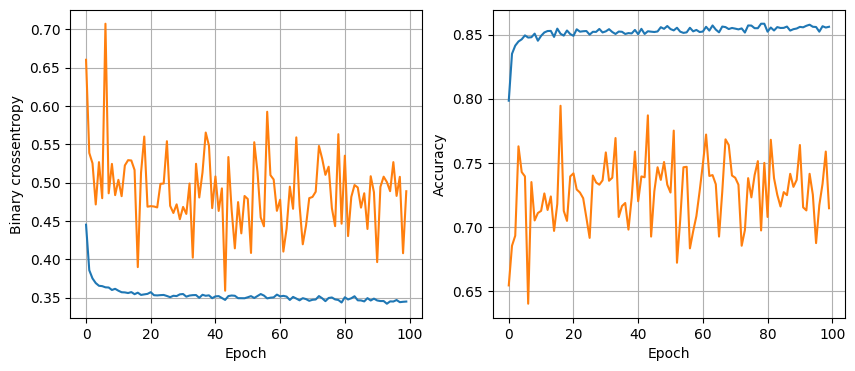

119/119 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.8767
16 nodes, dropout 0.2, lr 0.01, batch size 64


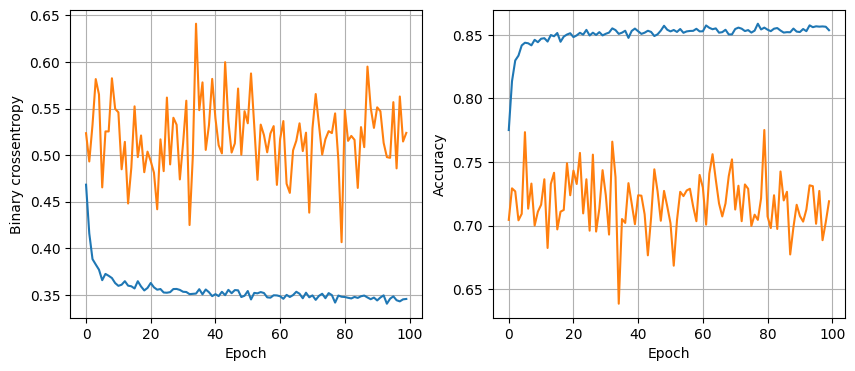

119/119 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.01, batch size 128


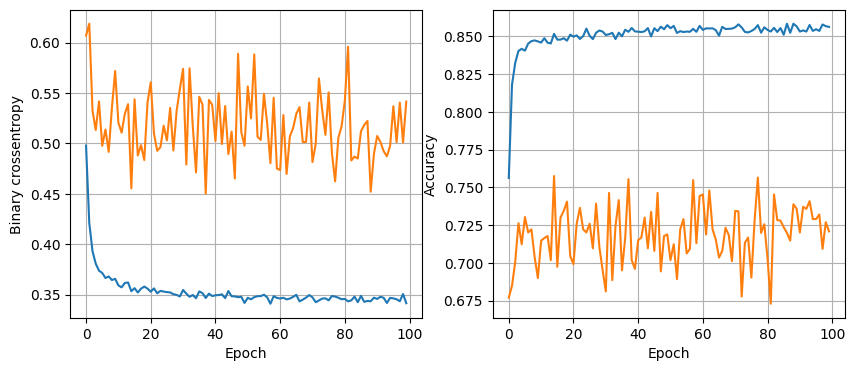

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8722
16 nodes, dropout 0.2, lr 0.005, batch size 32


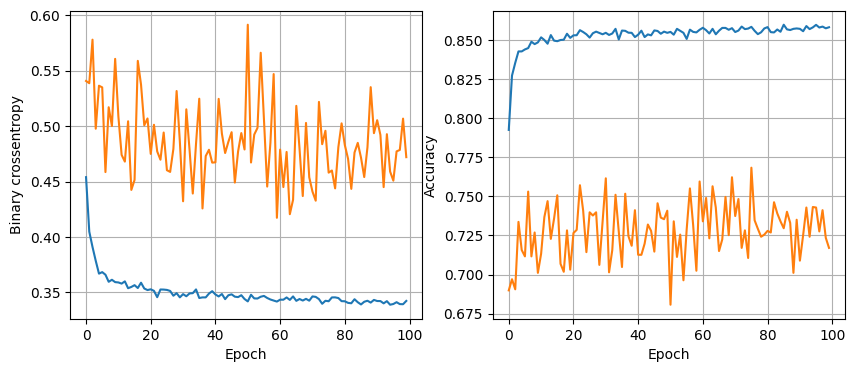

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.005, batch size 64


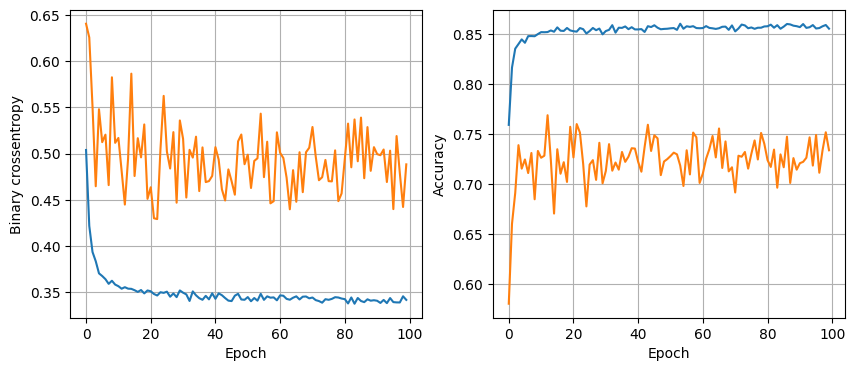

119/119 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.005, batch size 128


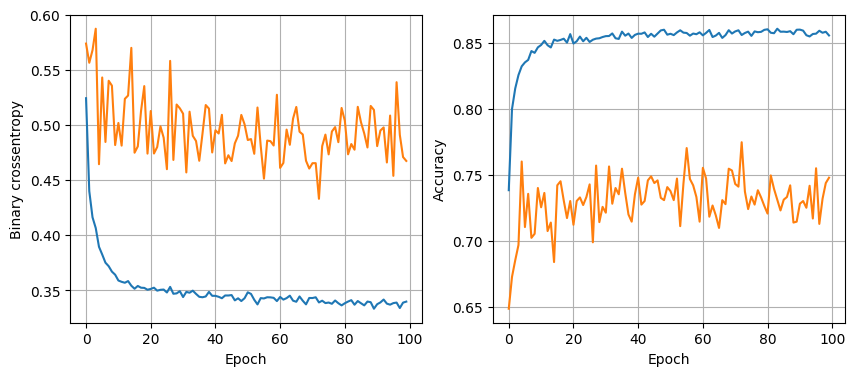

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.001, batch size 32


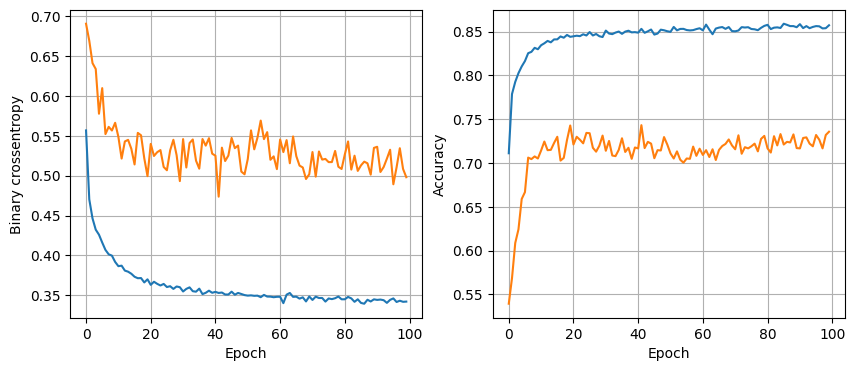

119/119 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.001, batch size 64


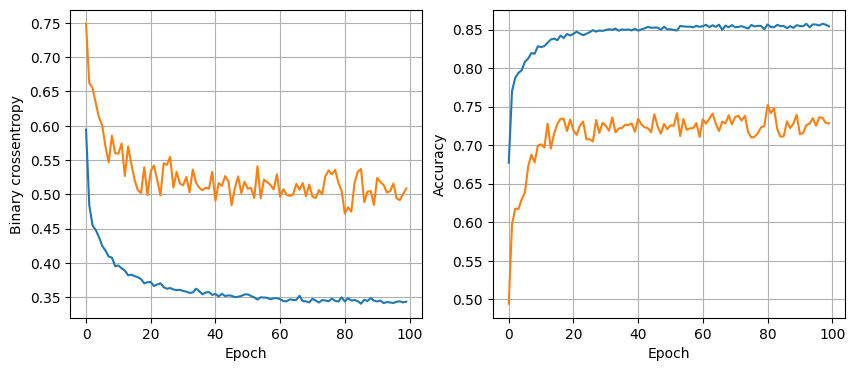

119/119 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.001, batch size 128


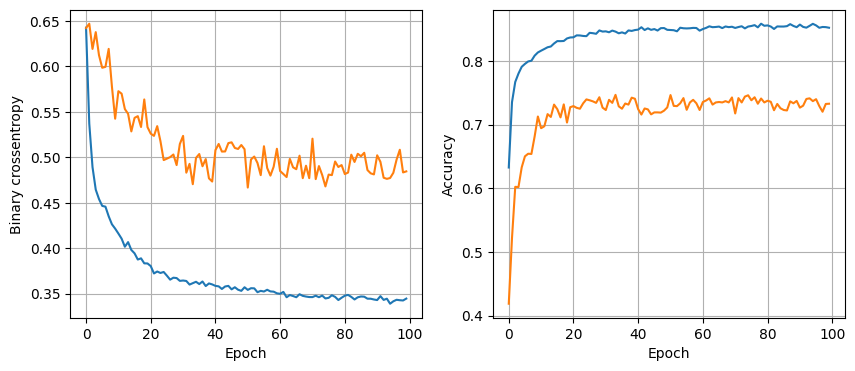

119/119 [==============================] - 1s 4ms/step - loss: 0.3139 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.01, batch size 32


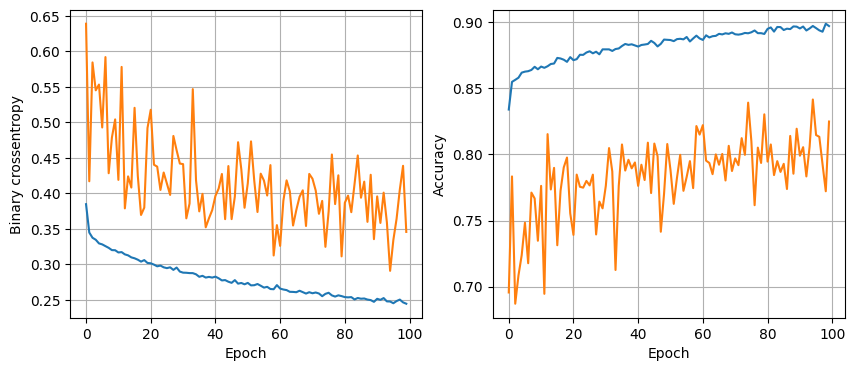

119/119 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8544
32 nodes, dropout 0, lr 0.01, batch size 64


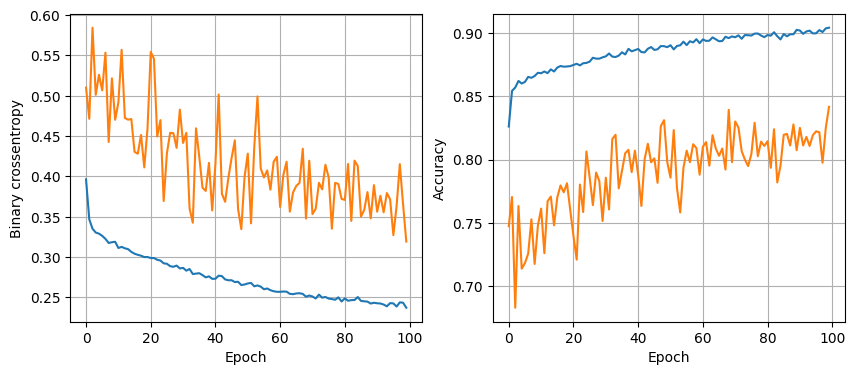

119/119 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.01, batch size 128


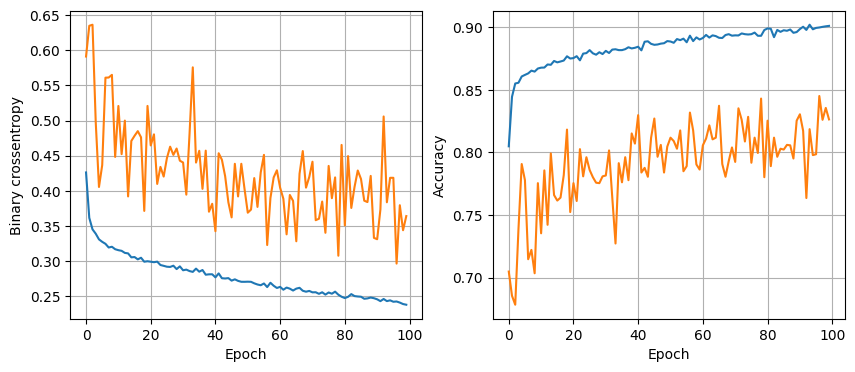

119/119 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8728
32 nodes, dropout 0, lr 0.005, batch size 32


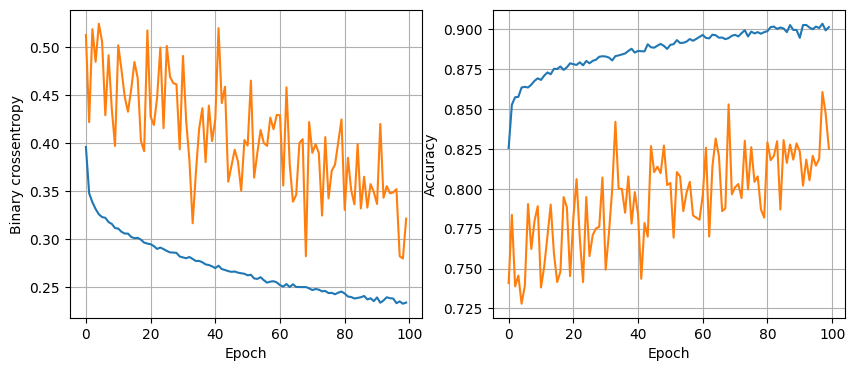

119/119 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.005, batch size 64


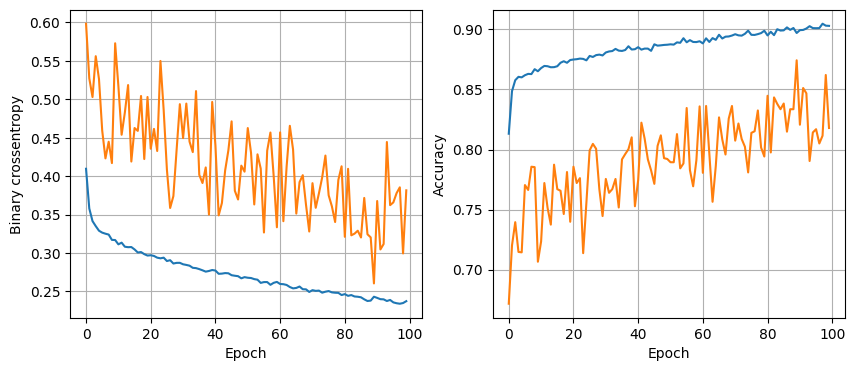

119/119 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8775
32 nodes, dropout 0, lr 0.005, batch size 128


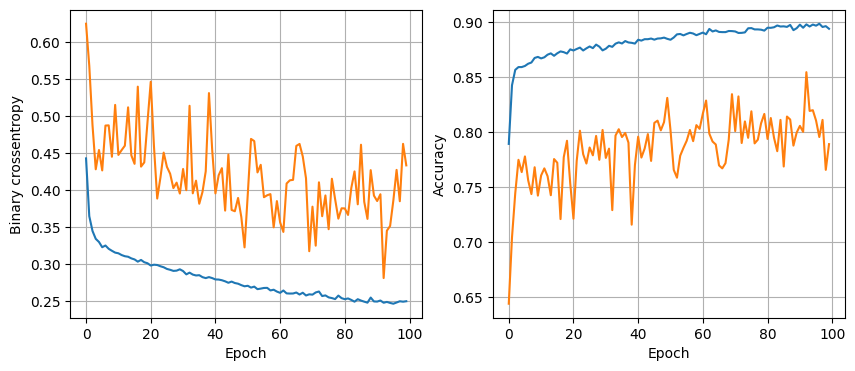

119/119 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch size 32


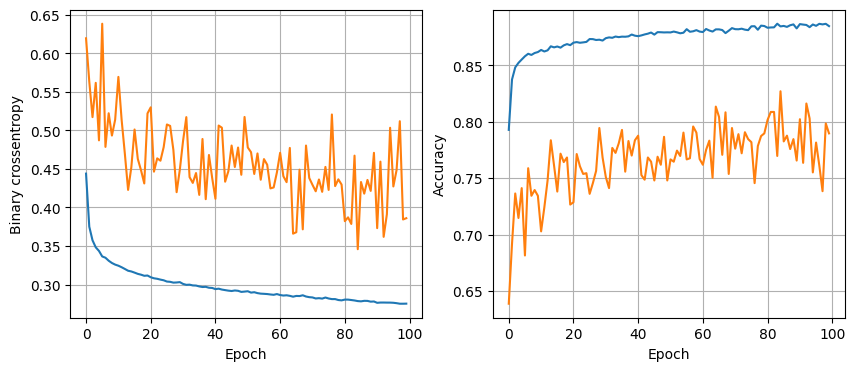

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8743
32 nodes, dropout 0, lr 0.001, batch size 64


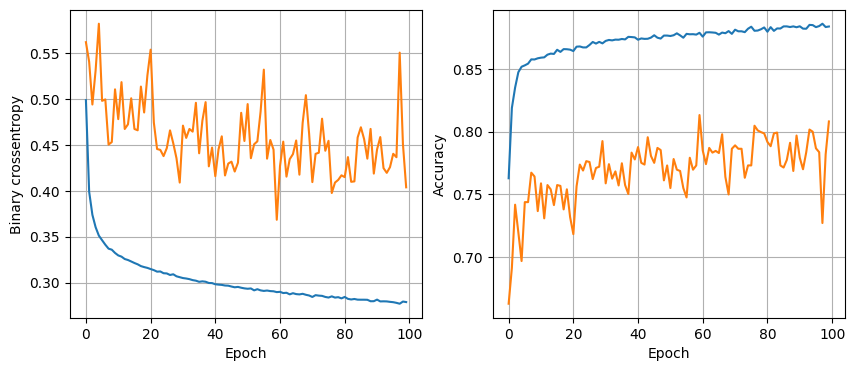

119/119 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8736
32 nodes, dropout 0, lr 0.001, batch size 128


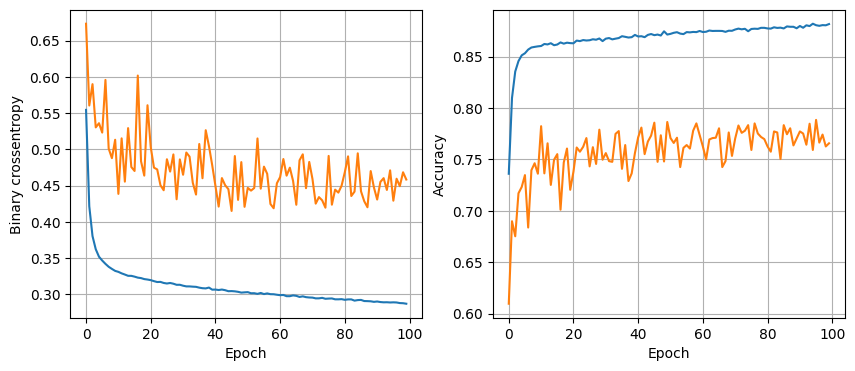

119/119 [==============================] - 1s 7ms/step - loss: 0.3018 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.01, batch size 32


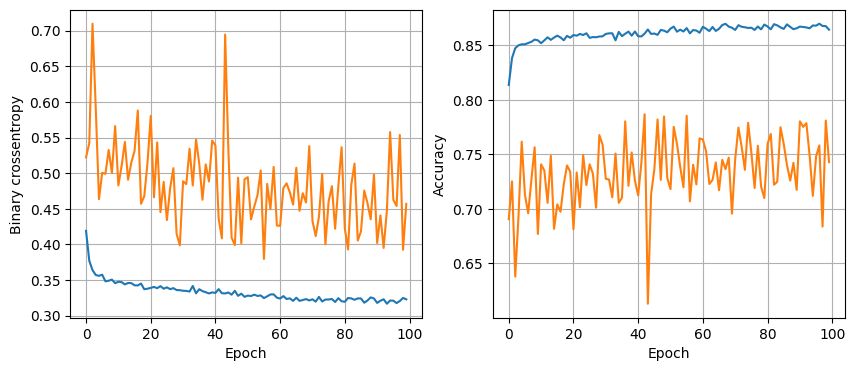

119/119 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.01, batch size 64


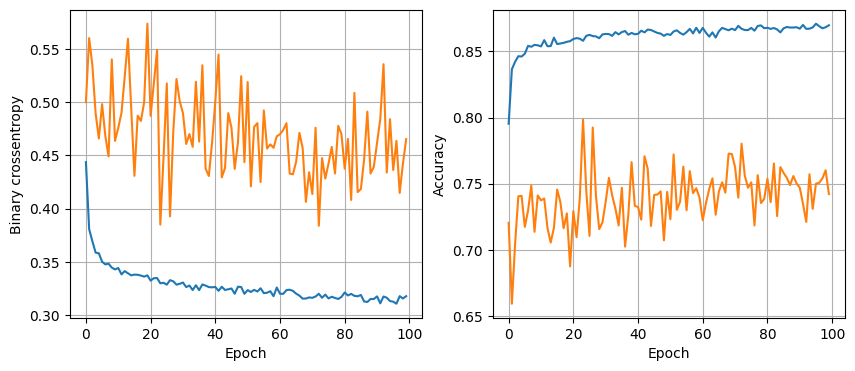

119/119 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.01, batch size 128


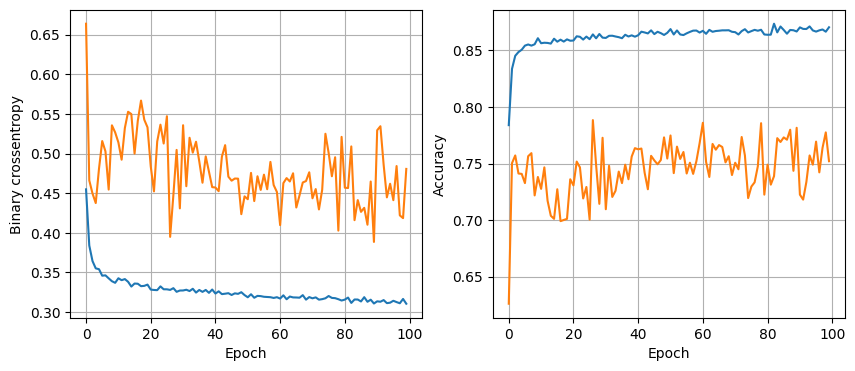

119/119 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.005, batch size 32


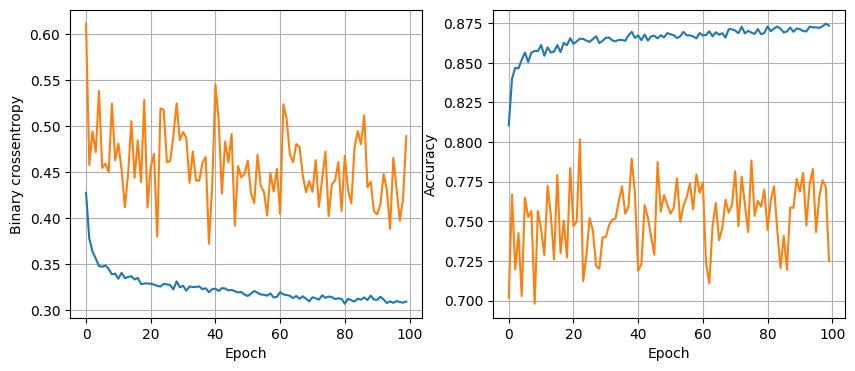

119/119 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.005, batch size 64


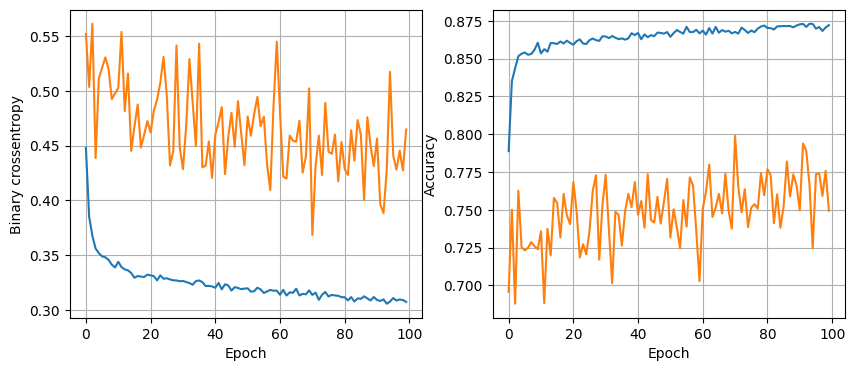

119/119 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.005, batch size 128


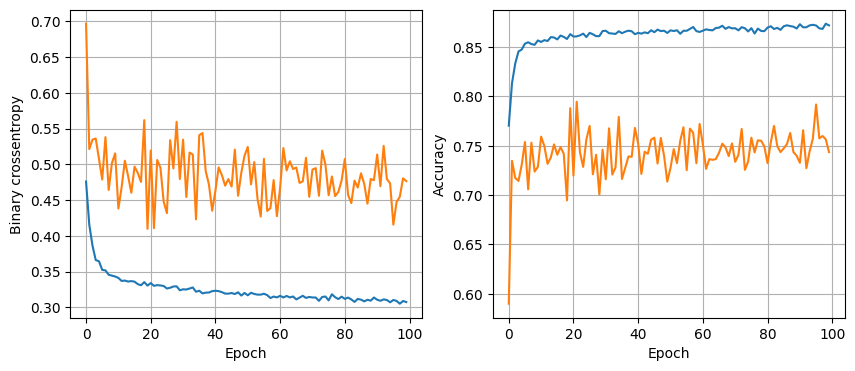

119/119 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.001, batch size 32


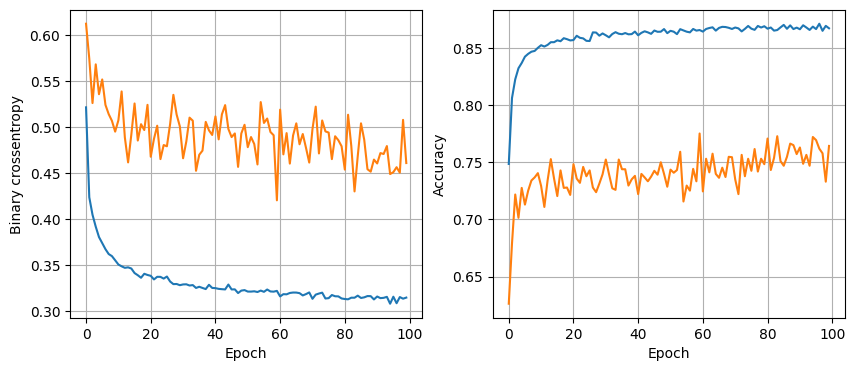

119/119 [==============================] - 1s 2ms/step - loss: 0.2909 - accuracy: 0.8825
32 nodes, dropout 0.2, lr 0.001, batch size 64


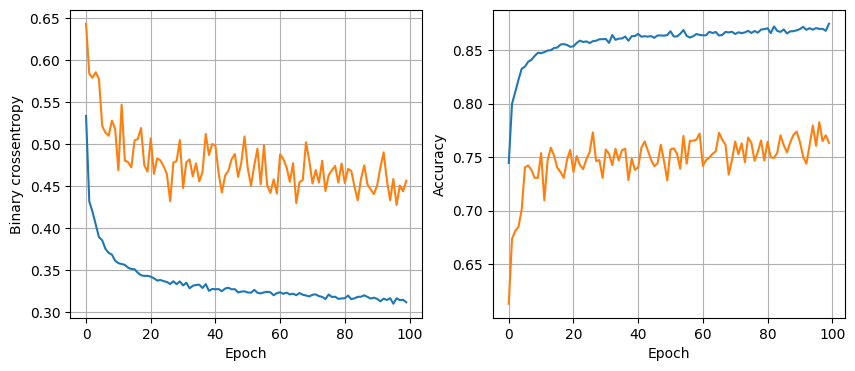

119/119 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8804
32 nodes, dropout 0.2, lr 0.001, batch size 128


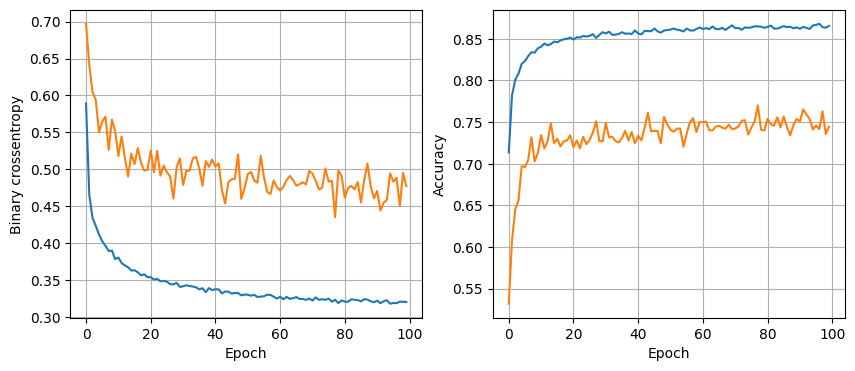

119/119 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8746
64 nodes, dropout 0, lr 0.01, batch size 32


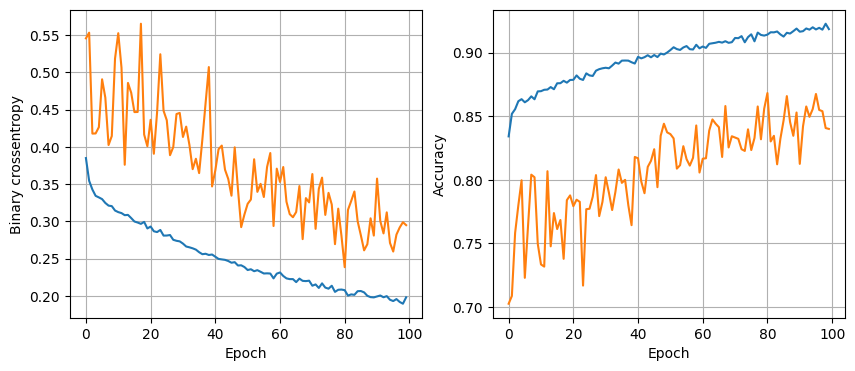

119/119 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8701
64 nodes, dropout 0, lr 0.01, batch size 64


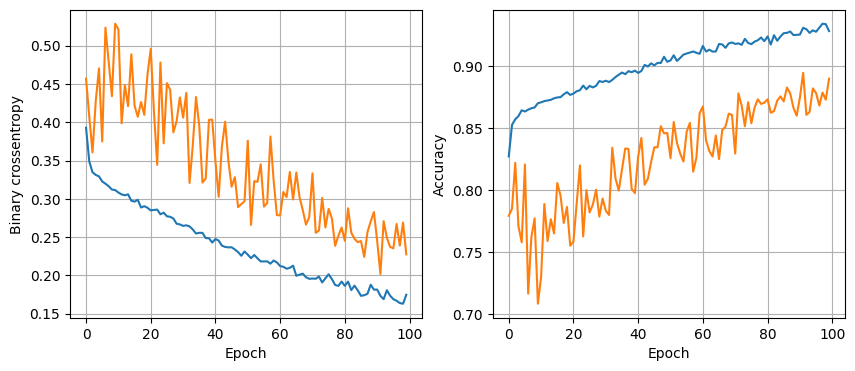

119/119 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.01, batch size 128


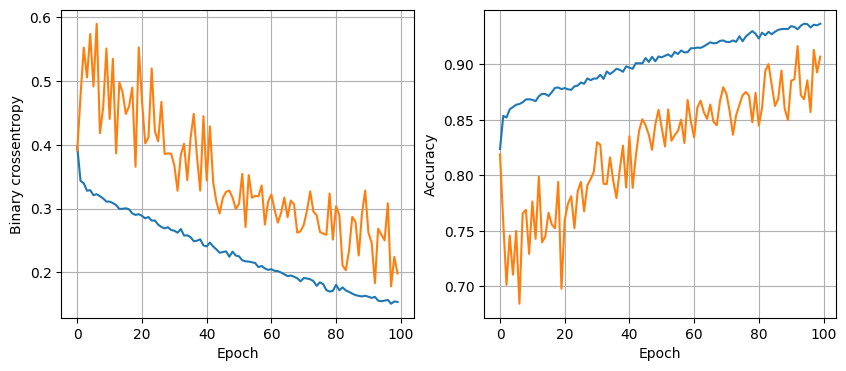

119/119 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8580
64 nodes, dropout 0, lr 0.005, batch size 32


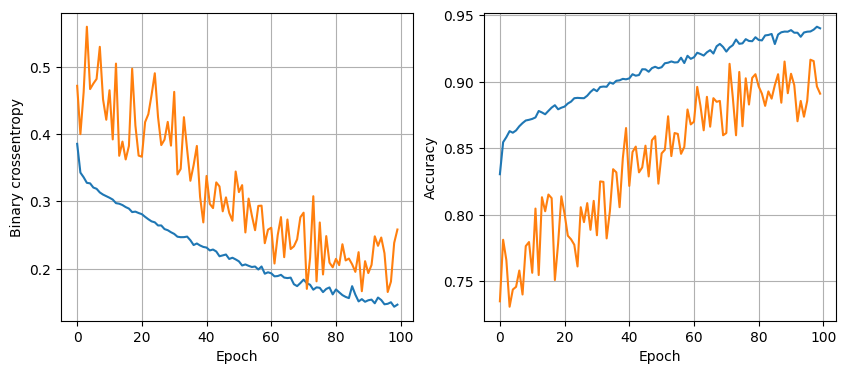

119/119 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.005, batch size 64


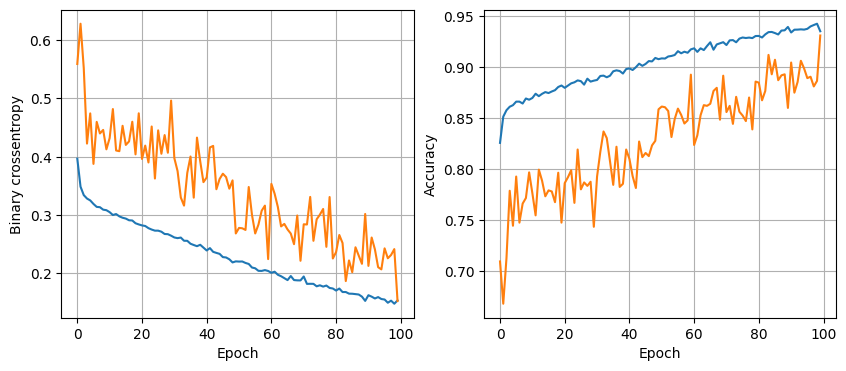

119/119 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8399
64 nodes, dropout 0, lr 0.005, batch size 128


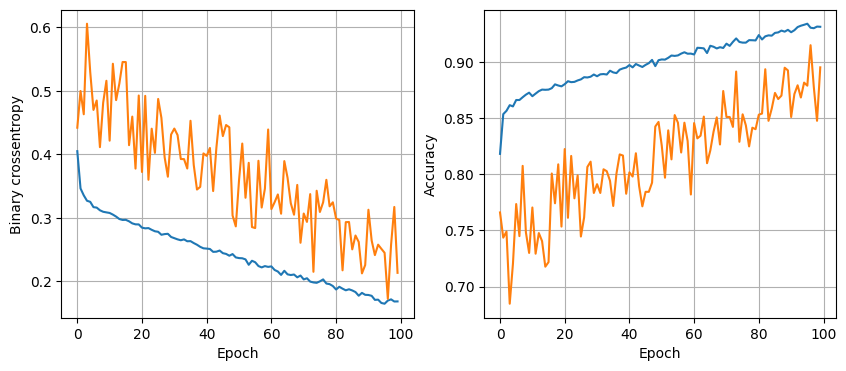

119/119 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8599
64 nodes, dropout 0, lr 0.001, batch size 32


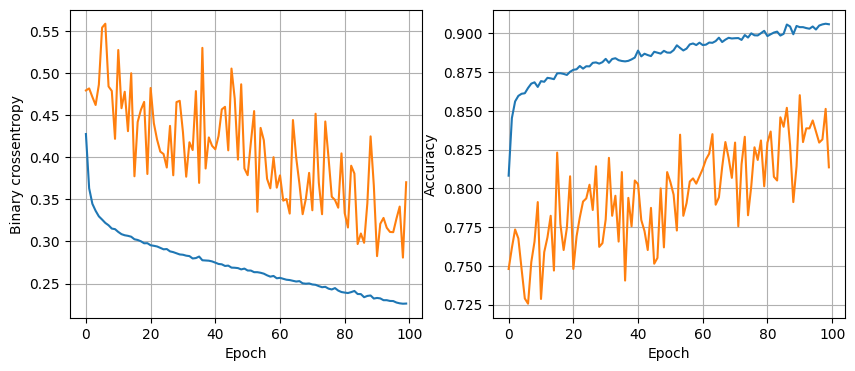

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8754
64 nodes, dropout 0, lr 0.001, batch size 64


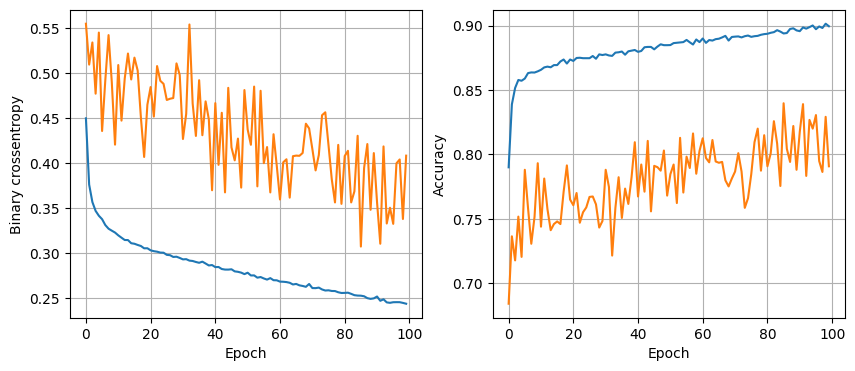

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8730
64 nodes, dropout 0, lr 0.001, batch size 128


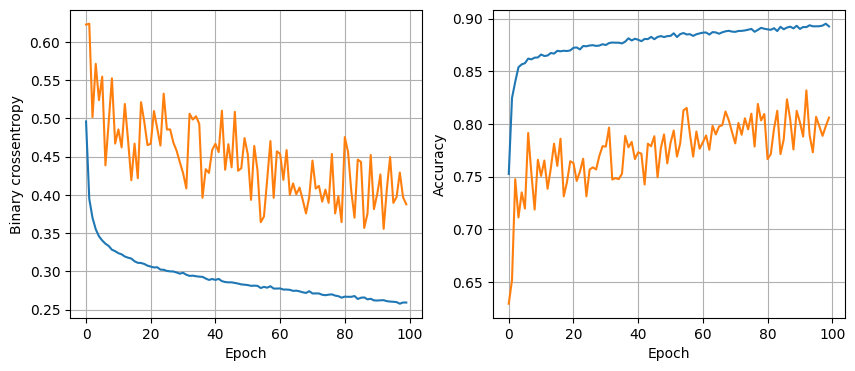

119/119 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch size 32


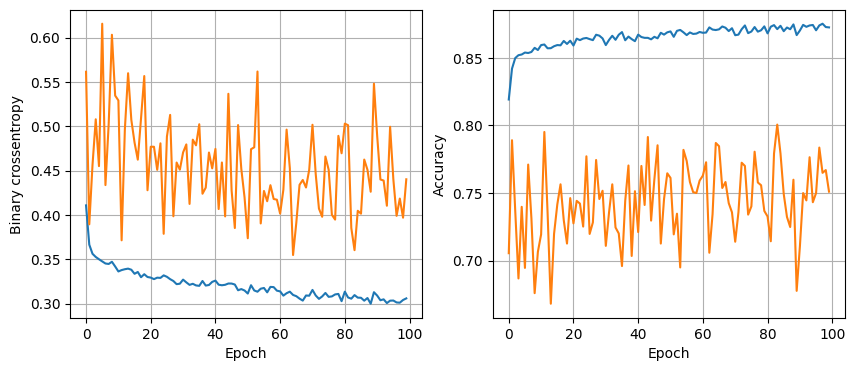

119/119 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.01, batch size 64


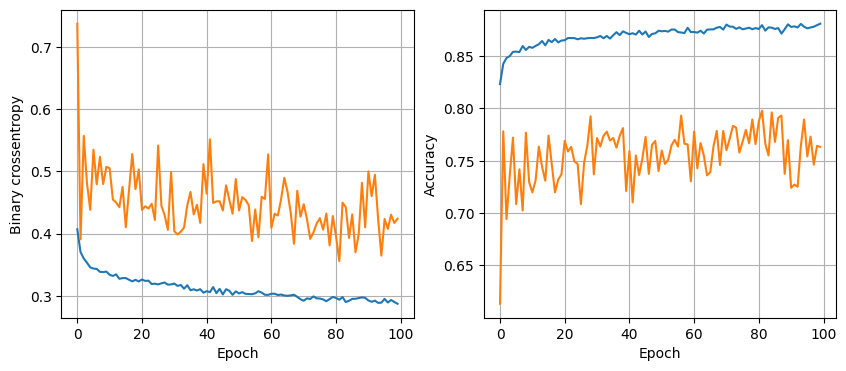

119/119 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8825
64 nodes, dropout 0.2, lr 0.01, batch size 128


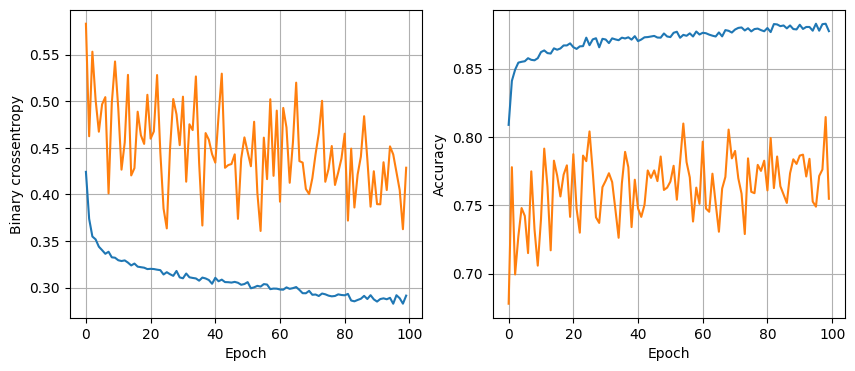

119/119 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8807
64 nodes, dropout 0.2, lr 0.005, batch size 32


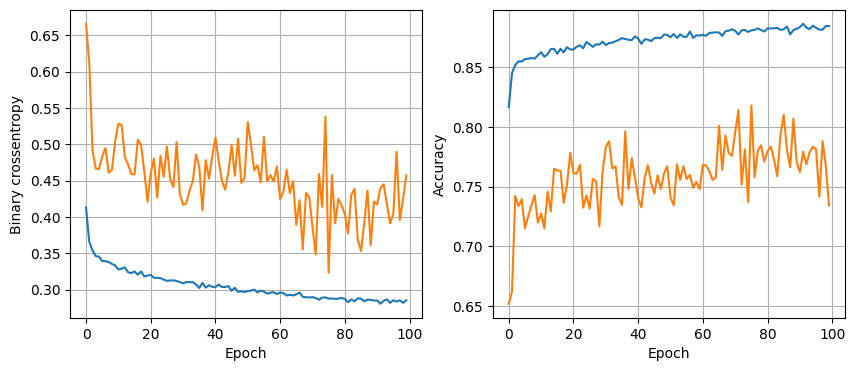

119/119 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8801
64 nodes, dropout 0.2, lr 0.005, batch size 64


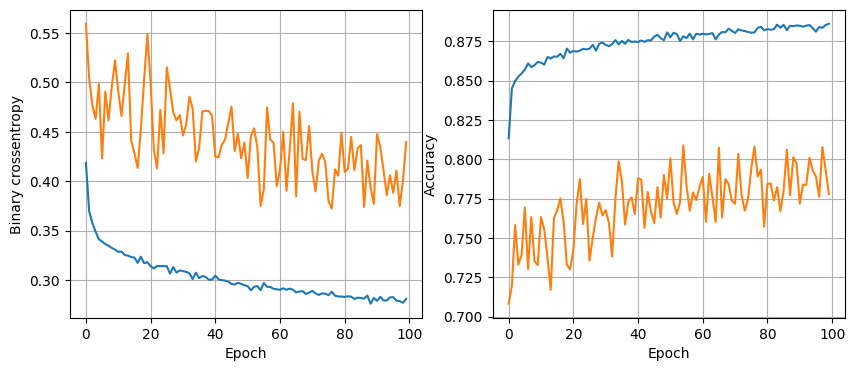

119/119 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8856
64 nodes, dropout 0.2, lr 0.005, batch size 128


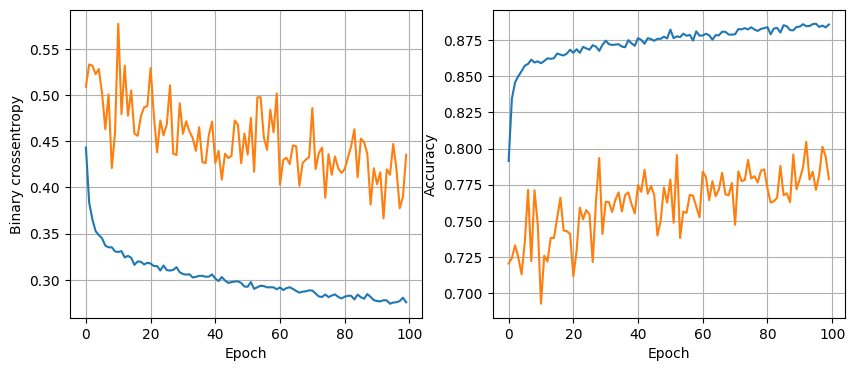

119/119 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8854
64 nodes, dropout 0.2, lr 0.001, batch size 32


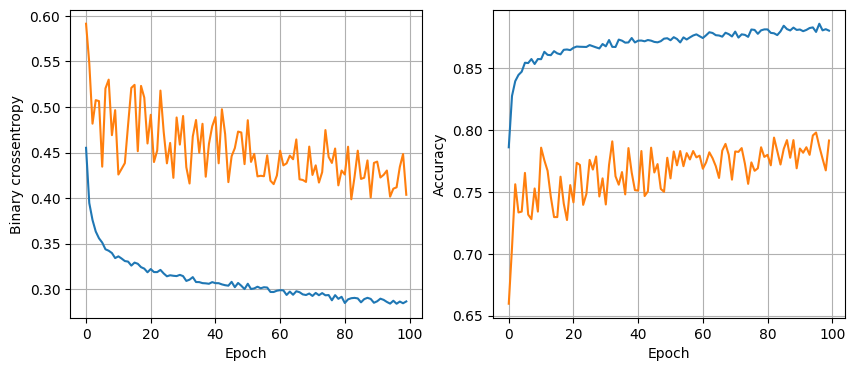

119/119 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8825
64 nodes, dropout 0.2, lr 0.001, batch size 64


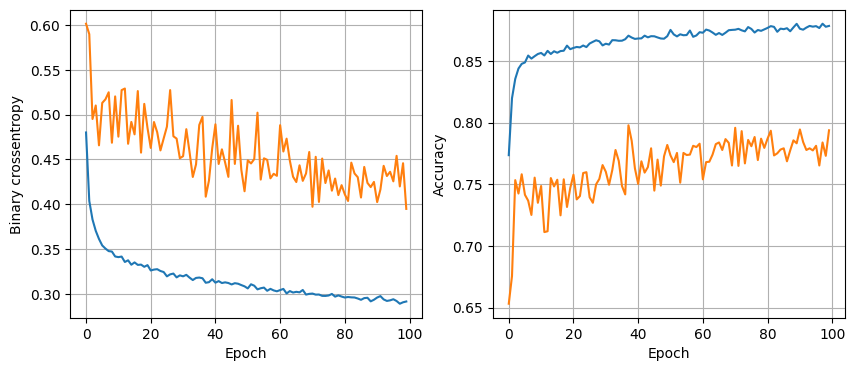

119/119 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.001, batch size 128


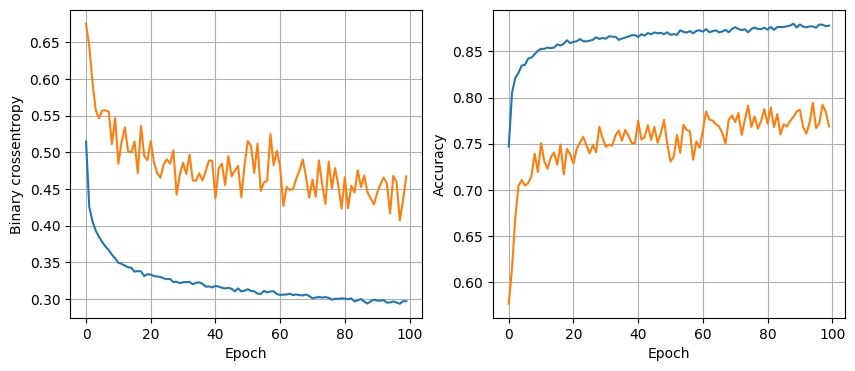

119/119 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8801


In [58]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [59]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1297
           1       0.88      0.95      0.91      2507

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Scale the training data and oversample it using the scale_dataset function
train_data, X_train, y_train = scale_dataset(train, oversample=True)


# Scale the validation and testing data using the scale_dataset function
valid_data, X_valid, y_valid = scale_dataset(valid)

test_data, X_test, y_test = scale_dataset(test)


# Train a decision tree model using the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the validation and testing data
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the validation and testing data
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation accuracy: {valid_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")



Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Train a random forest model using the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation and testing data
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the validation and testing data
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation accuracy: {valid_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")
